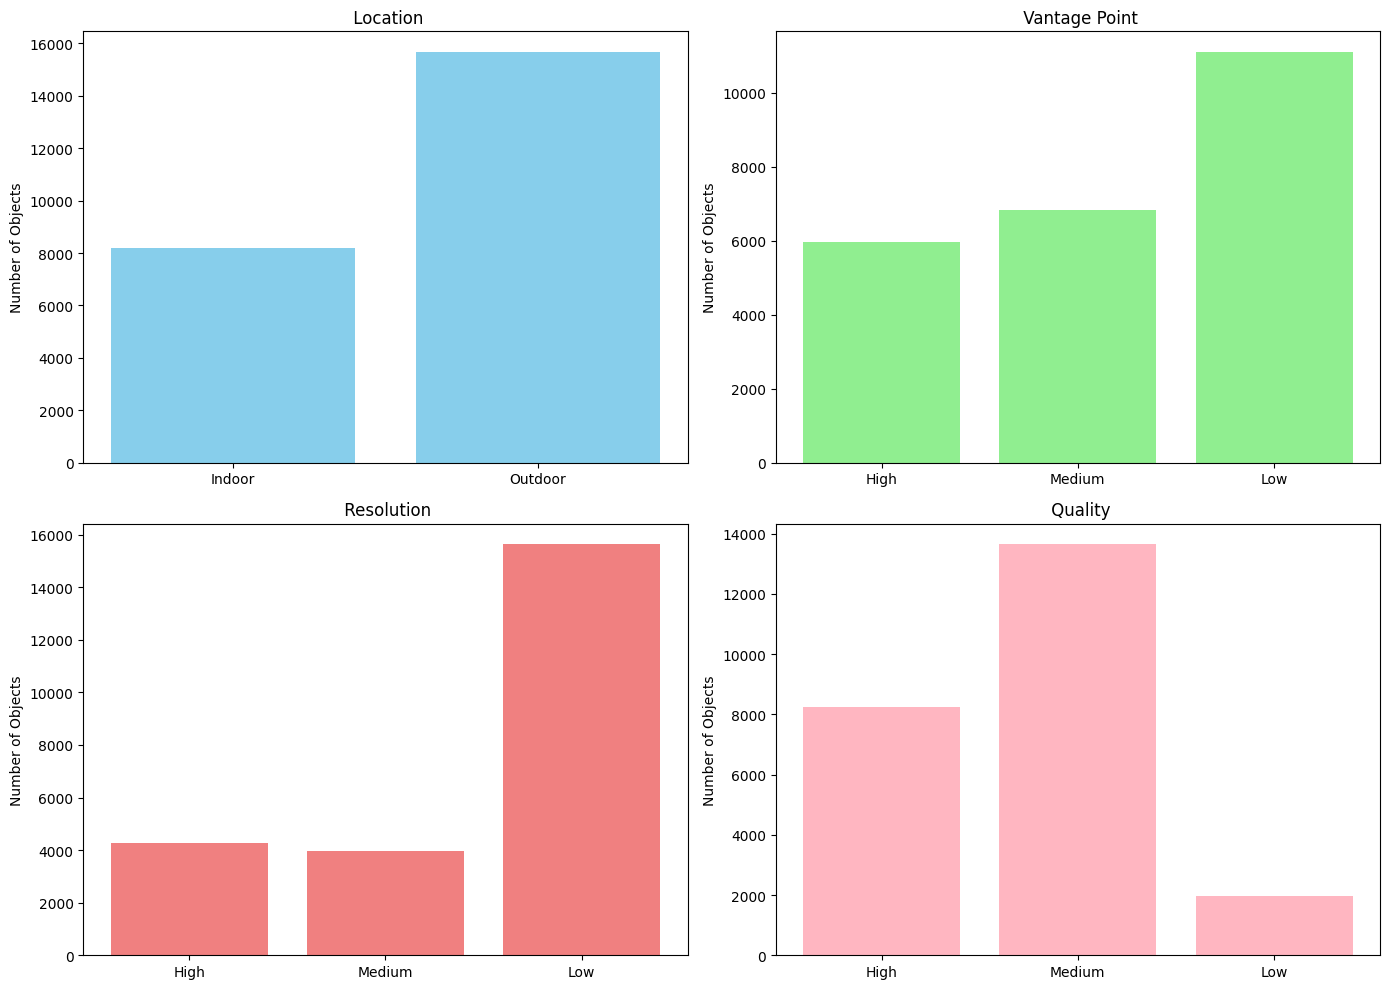

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Path to the camera properties file
view_properties_path = 'D:/Dataset/dana36/views.txt'

# Load the camera properties
camera_properties = []
with open(view_properties_path, 'r') as file:
    for line in file:
        properties = list(map(int, line.strip().split(',')))
        camera_properties.append(properties)

# Example properties interpretation:
# camera_properties[i] = [Location, Vantage Point, Resolution, Quality]

# Initialize counters for each property
location_counts = [0, 0]  # Indoor, Outdoor
vantage_counts = [0, 0, 0]  # High, Medium, Low
resolution_counts = [0, 0, 0]  # High, Medium, Low
quality_counts = [0, 0, 0]  # High, Medium, Low

# Path to the root 'views' directory containing the 36 directories
root_dir = 'D:/Dataset/dana36/views'

# Aggregate object counts based on camera properties
for view_index, properties in enumerate(camera_properties):
    # Get the annotations directory for the current view (01 to 36)
    view_dir = os.path.join(root_dir, f'{str(view_index + 1).zfill(2)}', 'annotations')

    # Count the number of objects in each frame
    total_objects = 0
    for annotation_file in os.listdir(view_dir):
        if annotation_file.endswith('.txt'):
            # Read the annotation file and count non-zero lines
            with open(os.path.join(view_dir, annotation_file), 'r') as file:
                lines = file.readlines()
                total_objects += sum(1 for line in lines if line.strip() != '0,0,0,0')

    # Update counts based on the properties of this view
    location_counts[properties[0] - 1] += total_objects
    vantage_counts[properties[1] - 1] += total_objects
    resolution_counts[properties[2] - 1] += total_objects
    quality_counts[properties[3] - 1] += total_objects

# Plotting the distributions for each property
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Location distribution
axs[0, 0].bar(['Indoor', 'Outdoor'], location_counts, color='skyblue')
axs[0, 0].set_title(' Location')
axs[0, 0].set_ylabel('Number of Objects')

# Vantage point distribution
axs[0, 1].bar(['High', 'Medium', 'Low'], vantage_counts, color='lightgreen')
axs[0, 1].set_title(' Vantage Point')
axs[0, 1].set_ylabel('Number of Objects')

# Resolution distribution
axs[1, 0].bar(['High', 'Medium', 'Low'], resolution_counts, color='lightcoral')
axs[1, 0].set_title(' Resolution')
axs[1, 0].set_ylabel('Number of Objects')

# Quality distribution
axs[1, 1].bar(['High', 'Medium', 'Low'], quality_counts, color='lightpink')
axs[1, 1].set_title(' Quality')
axs[1, 1].set_ylabel('Number of Objects')

# Layout adjustments
plt.tight_layout()
plt.show()